<a href="https://colab.research.google.com/github/RatanakamonS/DADS5001-PART1/blob/main/Test_Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install shap
!pip install pythainlp
!pip install epitran
!pip install emoji

In [ ]:
# เอา scipy ตัวที่มี misc.factorial
#!wget -q -O /usr/local/lib/python3.6/dist-packages/scipy/misc/__init__.py \
#https://raw.githubusercontent.com/scipy/scipy/095febe7ed34345779dc3768a2b89ea09c108c48/scipy/misc/__init__.py
# import plotline
#from plotnine import *

In [ ]:
# download font thai, update registry
import matplotlib as mpl
!wget https://github.com/Phonbopit/sarabun-webfont/raw/master/fonts/thsarabunnew-webfont.ttf
mpl.font_manager.fontManager.addfont('thsarabunnew-webfont.ttf') # Ensuring matplotlib recognizes the font
mpl.rc('font', family='TH Sarabun New') # Setting the default font to TH Sarabun New

--2024-09-09 12:24:36--  https://github.com/Phonbopit/sarabun-webfont/raw/master/fonts/thsarabunnew-webfont.ttf
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/Phonbopit/sarabun-webfont/master/fonts/thsarabunnew-webfont.ttf [following]
--2024-09-09 12:24:36--  https://raw.githubusercontent.com/Phonbopit/sarabun-webfont/master/fonts/thsarabunnew-webfont.ttf
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 98308 (96K) [application/octet-stream]
Saving to: ‘thsarabunnew-webfont.ttf.14’

thsarabunnew-webfon 100%[===================>]  96.00K  --.-KB/s    in 0.02s   

2024-09-09 12:24:36 (5.36 MB/s) -

In [ ]:
import gspread
import pandas as pd
import matplotlib.pyplot as plt
from google.auth import default
from google.colab import auth
auth.authenticate_user()
creds, _ = default()
gc = gspread.authorize(creds)
spreadsheet = gc.open_by_key('1Ml6R5X3z86PWYCR6429RmlDeJquGstzow6mqbrdgVL8')
worksheet = spreadsheet.get_worksheet(0)
df = pd.DataFrame(worksheet.get())
# Code for making the first row as header. Remove if not needed.
df.columns = df.iloc[0]
df = df.drop(0)
df

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69 entries, 1 to 69
Data columns (total 12 columns):
 #   Column                                                           Non-Null Count  Dtype 
---  ------                                                           --------------  ----- 
 0   Timestamp                                                        69 non-null     object
 1   เพศของผู้ตอบแบบสอบถาม                                            69 non-null     object
 2   ช่วงอายุของผู้ตอบแบบสอบถาม                                       69 non-null     object
 3   อาชีพของผู้ตอบแบบสอบถาม                                          69 non-null     object
 4   ช่วงเงินเดือนของผู้ตอบแบบสอบถาม                                  69 non-null     object
 5   ปัจจุบันท่านใช้สมาร์ทโฟนระบบปฎิบัติการใด                         69 non-null     object
 6   ท่านใช้สมาร์ทโฟนในการทำอะไรมากที่สุด [เล่นเกม]                   69 non-null     object
 7   ท่านใช้สมาร์ทโฟนในการทำอะไรมากที่สุด [เล่นโซเชี่ยลมีเดี

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder


# One-Hot encoding
encoding = OneHotEncoder(sparse_output=False)

# Apply one-hot encoding to each column separately
#1
encoded_sex = encoding.fit_transform(df[['เพศของผู้ตอบแบบสอบถาม']])
sex_categories = encoding.categories_[0]
#2
encoded_age = encoding.fit_transform(df[['ช่วงอายุของผู้ตอบแบบสอบถาม']])
age_categories = encoding.categories_[0]
#3
encoded_job = encoding.fit_transform(df[['อาชีพของผู้ตอบแบบสอบถาม']])
job_categories = encoding.categories_[0]
#4
encoded_salary = encoding.fit_transform(df[['ช่วงเงินเดือนของผู้ตอบแบบสอบถาม']])
salary_categories = encoding.categories_[0]
#5
os_df = df[['ปัจจุบันท่านใช้สมาร์ทโฟนระบบปฎิบัติการใด']]
os_df = os_df.rename(columns={'ปัจจุบันท่านใช้สมาร์ทโฟนระบบปฎิบัติการใด': 'OS'})
os_df.OS[os_df.OS == 'Android'] = 0
os_df.OS[os_df.OS == 'IOS'] = 1
#6
encoded_game = encoding.fit_transform(df[['ท่านใช้สมาร์ทโฟนในการทำอะไรมากที่สุด [เล่นเกม]']])
game_categories = encoding.categories_[0]
#7
encoded_social = encoding.fit_transform(df[['ท่านใช้สมาร์ทโฟนในการทำอะไรมากที่สุด [เล่นโซเชี่ยลมีเดีย]']])
social_categories = encoding.categories_[0]
#8
encoded_entertain = encoding.fit_transform(df[['ท่านใช้สมาร์ทโฟนในการทำอะไรมากที่สุด [ดูหนัง ฟังเพลง]']])
entertain_categories = encoding.categories_[0]
#9
encoded_pic = encoding.fit_transform(df[['ท่านใช้สมาร์ทโฟนในการทำอะไรมากที่สุด [ถ่ายรูป ถ่ายวิดีโอ]']])
pic_categories = encoding.categories_[0]
#10
encoded_brand = encoding.fit_transform(df[['หากท่านซื้อสมาร์ทโฟนเครื่องใหม่ จะใช้เลือกซื้อสมาร์ทโฟนแบรนด์ใด']])
brand_categories = encoding.categories_[0]
#11
memo_df = df[['จากข้อที่แล้ว เนื่องจากสาเหตุใด']]


# Concatenate the encoded columns
dummies = np.concatenate((os_df, memo_df, encoded_sex, encoded_age, encoded_job, encoded_salary, encoded_game, encoded_social, encoded_entertain, encoded_pic, encoded_brand), axis=1)
#print(encoded_sex)
#print(dummies)
# Create a new DataFrame with the encoded columns
df_onehot2 = pd.DataFrame(dummies)

# Create descriptive column names
sex_columns = [f"Sex_{cat}" for cat in sex_categories]
age_columns = [f"Age_{cat}" for cat in age_categories]
job_columns = [f"Job_{cat}" for cat in job_categories]
salary_columns = [f"Salary_{cat}" for cat in salary_categories]
game_columns = [f"Game_{cat}" for cat in game_categories]
social_columns = [f"Social_{cat}" for cat in social_categories]
entertain_columns = [f"Entertain_{cat}" for cat in entertain_categories]
pic_columns = [f"Pic_{cat}" for cat in pic_categories]
brand_columns = [f"Brand_{cat}" for cat in brand_categories]

# Assign column names
df_onehot2.columns = list(os_df.columns) + list(memo_df.columns) + sex_columns + age_columns + job_columns +  salary_columns + game_columns + social_columns + entertain_columns + pic_columns + brand_columns
df_onehot2.rename(columns={'ปัจจุบันท่านใช้สมาร์ทโฟนระบบปฎิบัติการใด': 'OS','จากข้อที่แล้ว เนื่องจากสาเหตุใด' : 'memo'},inplace=True)
# Print the resulting DataFrame
df2 = df_onehot2
df2

[[1 'ดูรวยดีย์' 0.0 ... 0.0 0.0 0.0]
 [1 'ความเสถียร' 1.0 ... 0.0 0.0 0.0]
 [1 'คุ้นเคยกับ Brand เดิม' 1.0 ... 0.0 0.0 0.0]
 ...
 [0 'ฟังก์ชั่นใหม่น่าใช้ และคุ้นเคยที่สุด' 0.0 ... 0.0 1.0 0.0]
 [1 'Ecosystem ดี' 1.0 ... 0.0 0.0 0.0]
 [0 'ใช้ง่าย' 1.0 ... 0.0 1.0 0.0]]


,OS,memo,Sex_ชาย,Sex_หญิง,Age_21-25 ปี,Age_26-30 ปี,Age_31-35 ปี,Age_36-40 ปี,Job_Freelancer,Job_ข้าราชการ,...,Pic_บ่อยครั้ง,Pic_บ่อยที่สุด,Pic_ปานกลาง,Brand_Google,Brand_Iphone,Brand_Nokia,Brand_Oneplus,Brand_Oppo,Brand_Samsung,Brand_ยังไม่รู้
0,1,ดูรวยดีย์,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,1,ความเสถียร,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,1,คุ้นเคยกับ Brand เดิม,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,1,ง่ายต่อการใช้งาน,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,1,ดี ทน,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,0,เป็นแบรนด์ที่น่าสนใจ,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
65,1,เพราะรู้สึกยุ่งยากในการย้ายข้อมูลส่วนตัว เเละ ...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
66,0,ฟังก์ชั่นใหม่น่าใช้ และคุ้นเคยที่สุด,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
67,1,Ecosystem ดี,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
columns_to_exclude = ['memo']
columns_to_convert = [col for col in df2.columns if col not in columns_to_exclude]

df2[columns_to_convert] = df2[columns_to_convert].astype(int)
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69 entries, 0 to 68
Data columns (total 47 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   OS                          69 non-null     int64 
 1   memo                        69 non-null     object
 2   Sex_ชาย                     69 non-null     int64 
 3   Sex_หญิง                    69 non-null     int64 
 4   Age_21-25 ปี                69 non-null     int64 
 5   Age_26-30 ปี                69 non-null     int64 
 6   Age_31-35 ปี                69 non-null     int64 
 7   Age_36-40 ปี                69 non-null     int64 
 8   Job_Freelancer              69 non-null     int64 
 9   Job_ข้าราชการ               69 non-null     int64 
 10  Job_นักศึกษา                69 non-null     int64 
 11  Job_รัฐวิสาหกิจ             69 non-null     int64 
 12  Job_ว่างงาน                 69 non-null     int64 
 13  Job_เอกชน                   69 non-null     int64 
 

In [ ]:
X = df2.iloc[:, 2:]
y = df2.iloc[:, 0]

In [ ]:
X

,Sex_ชาย,Sex_หญิง,Age_21-25 ปี,Age_26-30 ปี,Age_31-35 ปี,Age_36-40 ปี,Job_Freelancer,Job_ข้าราชการ,Job_นักศึกษา,Job_รัฐวิสาหกิจ,...,Pic_บ่อยครั้ง,Pic_บ่อยที่สุด,Pic_ปานกลาง,Brand_Google,Brand_Iphone,Brand_Nokia,Brand_Oneplus,Brand_Oppo,Brand_Samsung,Brand_ยังไม่รู้
0,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,1,0,0,1,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
2,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,0,1,0,1,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0
65,1,0,0,0,1,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
66,0,1,1,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,1,0
67,1,0,0,1,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0


In [ ]:
y

,OS
0,1
1,1
2,1
3,1
4,1
...,...
64,0
65,1
66,0
67,1


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score, f1_score
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = .7, random_state = 42)
#random_state คือ ค่า seed ที่กำหนดการ random กลุ่มข้อมูล จะเป็นเลขจำนวนเต็ม ถ้ากำหนดเลขเดิม ผลการ split ก็เหมือนเดิม
#ถ้าไม่ต้องการให้เกิดผลซ้ำได้ การเลือกตัวเลขเช่น 42 เป็นที่นิยมในหมู่นักพัฒนาเนื่องจากเป็นตัวเลขที่สุ่มและเข้าใจง่าย

from sklearn.linear_model import LogisticRegression
model = LogisticRegression() #solver='lbfgs' เหมาะกับ Big Data
model.fit(X_train, y_train)

y_pred=model.predict(X_test)

print("Confusion Matrix DataFrame:")
results_df2 = pd.DataFrame(confusion_matrix(y_test, y_pred)).rename({0:"Predicted_Android", 1:"Predicted_IOS"}, axis="columns")
results_df2.rename({0:"Actual_Android", 1:"Actual_IOS"}, axis="index")

Confusion Matrix DataFrame:


,Predicted_Android,Predicted_IOS
Actual_Android,2,0
Actual_IOS,0,19


In [ ]:
accuracy = accuracy_score(y_test, y_pred)

# คำนวณ F1 Score (ใช้ average='binary' สำหรับปัญหา binary classification)
f1 = f1_score(y_test, y_pred, average='weighted')

# ดึงค่า True Positive (TP), True Negative (TN), False Positive (FP), False Negative (FN)
TN, FP, FN, TP = confusion_matrix(y_test, y_pred).ravel()

# แสดงผลลัพธ์
print(f"Accuracy: {accuracy:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"True Positive (TP): {TP}")
print(f"True Negative (TN): {TN}")

Accuracy: 0.81
F1 Score: 0.78
True Positive (TP): 14
True Negative (TN): 3


In [ ]:
from sklearn.metrics import roc_curve # roc curve for models
pred_prob = model.predict_proba(X_test)
fpr, tpr, thresh1 = roc_curve(y_test, pred_prob[:,1],pos_label=1)
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

In [ ]:
# auc scores
from sklearn.metrics import roc_auc_score
auc_score = roc_auc_score(y_test, pred_prob[:,1])
auc_score

1.0

<ipython-input-130-bfaba35bf711>:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.


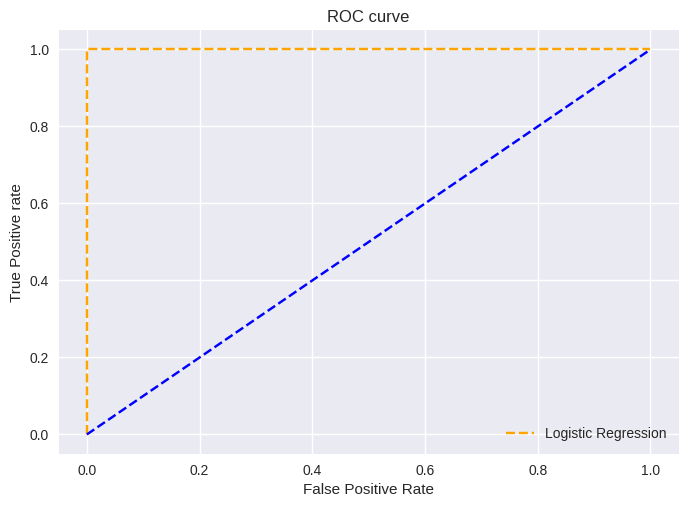

In [ ]:
plt.style.use('seaborn') # plot
plt.plot(fpr, tpr, linestyle='--',color='orange', label='Logistic Regression')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

In [ ]:
import shap

In [ ]:
print(X_train.shape)

(48, 45)


In [ ]:
print(X_test.shape)

(21, 45)


In [ ]:
explainer = shap.Explainer(model, X_test) #การใช้เครื่องมือ model กับ X ตัวแปร
shap_values = explainer(X_test) #ควรเป็น X test

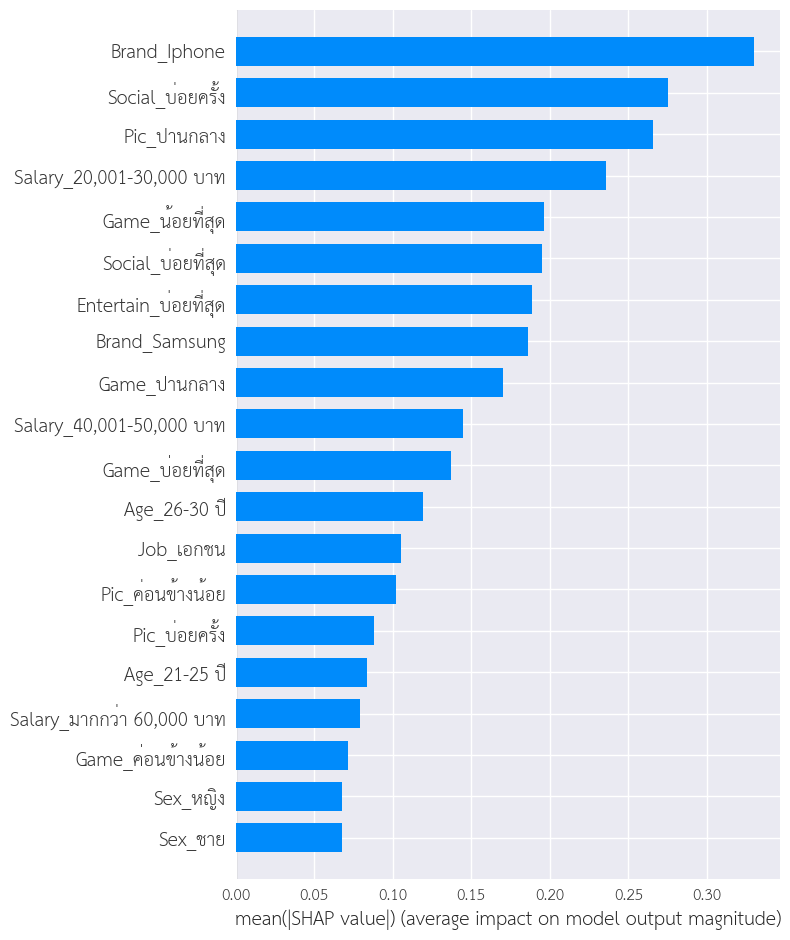

In [ ]:
shap.summary_plot(shap_values, X_test, feature_names=X.columns, plot_type="bar")

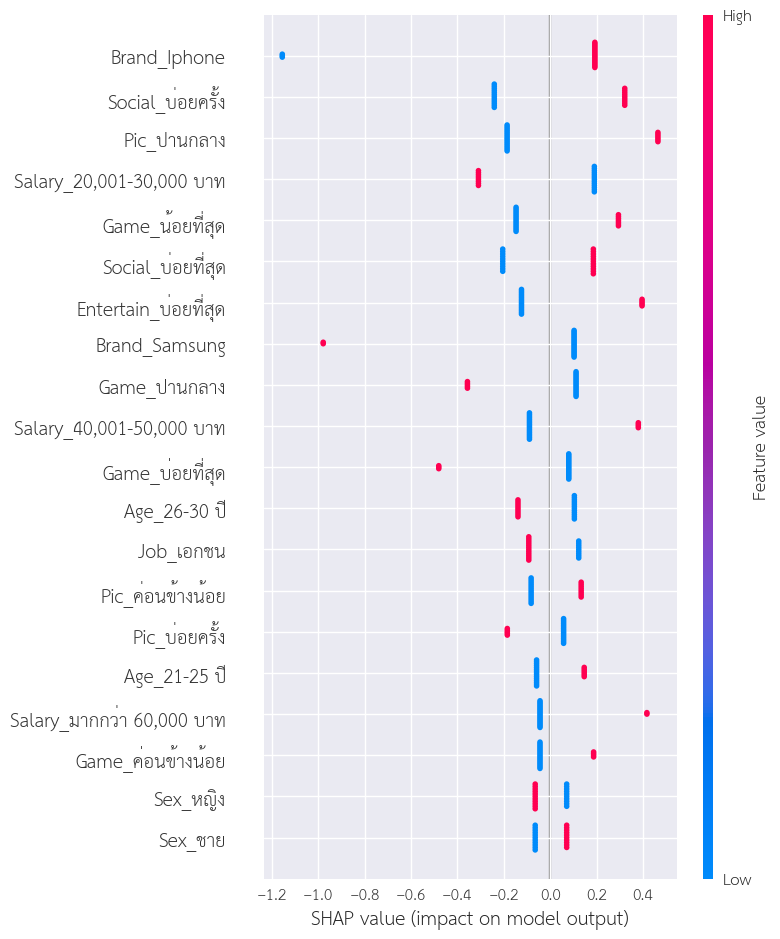

In [ ]:
shap.summary_plot(shap_values, X_test, feature_names=X.columns) #,plot_size=[13,10]

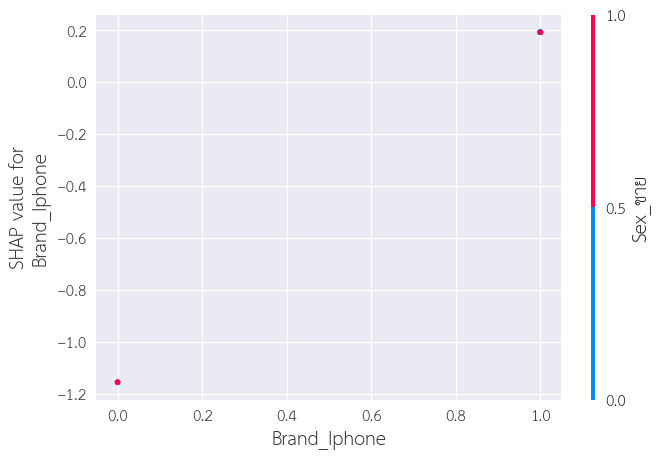

In [ ]:
shap_de1 = shap.dependence_plot("Brand_Iphone", shap_values.values, X_test) #หาคู่ที่ dependent ---> Brand_Iphone กับ Sex_ชาย มีความสำคัญใกล้กัน

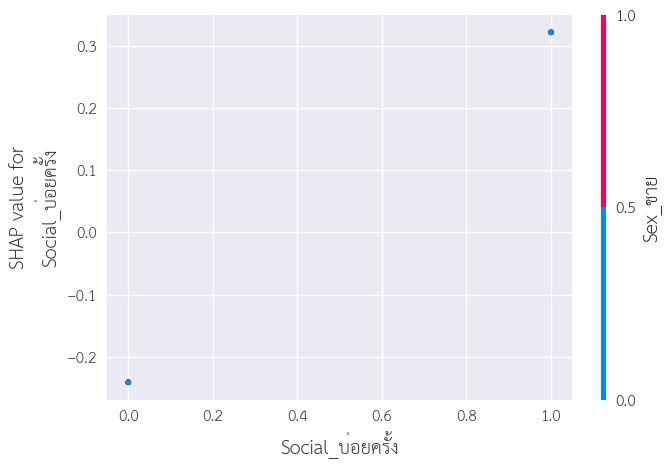

In [ ]:
shap.dependence_plot("Social_บ่อยครั้ง", shap_values.values, X_test) #หาคู่ที่ dependent ---> Brand_Iphone กับ Sex_ชาย มีความสำคัญใกล้กัน

In [ ]:
shap.initjs()
shap.plots.force(shap_values[0])

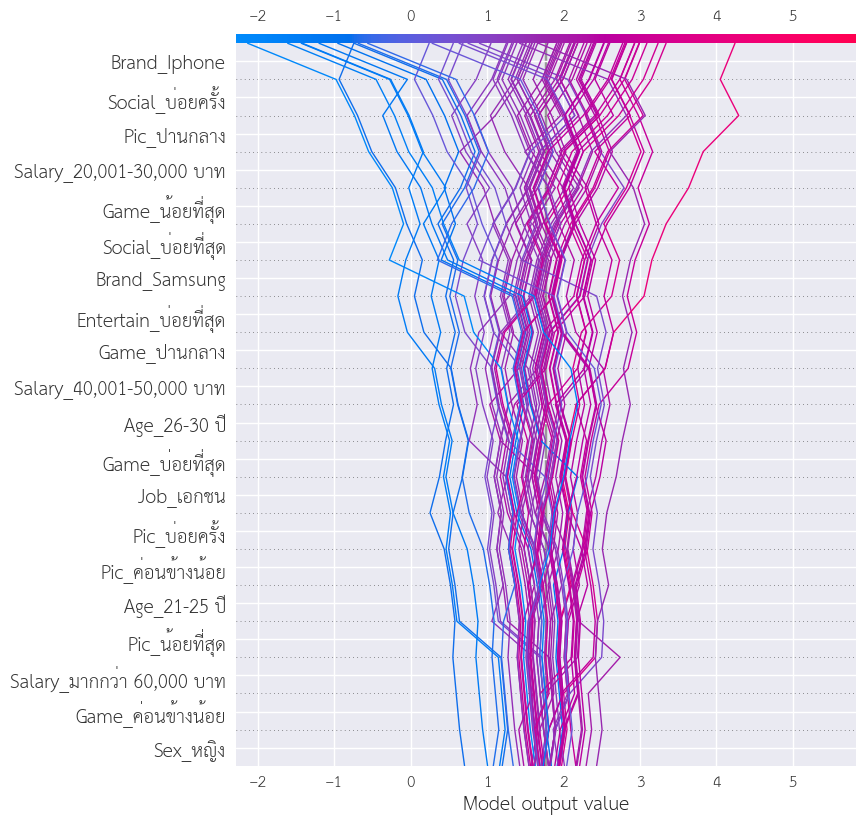

In [ ]:
shap.decision_plot(explainer.expected_value, explainer.shap_values(X), feature_names = list(X.columns))

In [ ]:
df_text = df2.iloc[:, [0, 1]]
df_text

,OS,memo
0,1,ดูรวยดีย์
1,1,ความเสถียร
2,1,คุ้นเคยกับ Brand เดิม
3,1,ง่ายต่อการใช้งาน
4,1,ดี ทน
...,...,...
64,0,เป็นแบรนด์ที่น่าสนใจ
65,1,เพราะรู้สึกยุ่งยากในการย้ายข้อมูลส่วนตัว เเละ ...
66,0,ฟังก์ชั่นใหม่น่าใช้ และคุ้นเคยที่สุด
67,1,Ecosystem ดี


In [ ]:
import pythainlp

pythainlp.__version__

'5.0.4'

In [ ]:
from pythainlp.ulmfit import process_thai

In [ ]:
df_text['processed'] = df_text['memo'].apply(process_thai)
df_text

<ipython-input-154-c441e0c79945>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,OS,memo,processed
0,1,ดูรวยดีย์,"[ดู, รวย, ดี, ย์]"
1,1,ความเสถียร,[ความเสถียร]
2,1,คุ้นเคยกับ Brand เดิม,"[คุ้นเคย, กับ, brand, เดิม]"
3,1,ง่ายต่อการใช้งาน,"[ง่าย, ต่อ, การใช้งาน]"
4,1,ดี ทน,"[ดี, ทน]"
...,...,...,...
64,0,เป็นแบรนด์ที่น่าสนใจ,"[เป็น, แบรนด์, ที่, น่าสนใจ]"
65,1,เพราะรู้สึกยุ่งยากในการย้ายข้อมูลส่วนตัว เเละ ...,"[เพราะ, รู้สึก, ยุ่งยาก, ใน, การ, ย้าย, ข้อมูล..."
66,0,ฟังก์ชั่นใหม่น่าใช้ และคุ้นเคยที่สุด,"[ฟังก์ชั่น, ใหม่, น่า, ใช้, และ, คุ้นเคย, ที่สุด]"
67,1,Ecosystem ดี,"[ecosystem, ดี]"


In [ ]:
df_text.loc[:, "processed"] = df_text.memo.map(lambda x: "|".join(process_thai(x)))
df_text.loc[:, "wc"] = df_text.processed.map(lambda x: len(x.split("|")))
df_text.loc[:, "uwc"] = df_text.processed.map(lambda x: len(set(x.split("|"))))
df_text

,OS,memo,processed,wc,uwc
0,1,ดูรวยดีย์,ดู|รวย|ดี|ย์,4,4
1,1,ความเสถียร,ความเสถียร,1,1
2,1,คุ้นเคยกับ Brand เดิม,คุ้นเคย|กับ|brand|เดิม,4,4
3,1,ง่ายต่อการใช้งาน,ง่าย|ต่อ|การใช้งาน,3,3
4,1,ดี ทน,ดี|ทน,2,2
...,...,...,...,...,...
64,0,เป็นแบรนด์ที่น่าสนใจ,เป็น|แบรนด์|ที่|น่าสนใจ,4,4
65,1,เพราะรู้สึกยุ่งยากในการย้ายข้อมูลส่วนตัว เเละ ...,เพราะ|รู้สึก|ยุ่งยาก|ใน|การ|ย้าย|ข้อมูล|ส่วนตั...,14,13
66,0,ฟังก์ชั่นใหม่น่าใช้ และคุ้นเคยที่สุด,ฟังก์ชั่น|ใหม่|น่า|ใช้|และ|คุ้นเคย|ที่สุด,7,7
67,1,Ecosystem ดี,ecosystem|ดี,2,2


In [ ]:
train_df, valid_df = train_test_split(df_text, test_size=0.3, random_state=42)
train_df = train_df.reset_index(drop=True)
valid_df = valid_df.reset_index(drop=True)

In [ ]:
print(train_df["OS"].value_counts() / train_df.shape[0])

OS
1    0.75
0    0.25
Name: count, dtype: float64


In [ ]:
print(valid_df["OS"].value_counts() / valid_df.shape[0])

OS
1    0.904762
0    0.095238
Name: count, dtype: float64


In [ ]:
y_train = train_df["OS"]
y_valid = valid_df["OS"]

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

tfidf = TfidfVectorizer(tokenizer=process_thai, ngram_range=(1,2), min_df=5, sublinear_tf=True)
tfidf_fit = tfidf.fit(df_text["memo"])
text_train = tfidf_fit.transform(train_df["memo"]) #1
text_valid = tfidf_fit.transform(valid_df["memo"])
text_test = tfidf_fit.transform(df_text["memo"]) #2
text_train.shape, text_valid.shape

((48, 5), (21, 5))